### Import libraries

In [1]:
import numpy as np
import pandas as pd

### load datasets

In [2]:
dataset = pd.read_csv('income_eva.csv')
dataset

,age,education-num,sex,capital-gain,hours-per-week,salary
0,39,13,Male,2174,40,<=50K
1,50,13,Male,0,13,<=50K
2,38,9,Male,0,40,<=50K
3,53,7,Male,0,40,<=50K
4,28,13,Female,0,40,<=50K
...,...,...,...,...,...,...
32556,27,12,Female,0,38,<=50K
32557,40,9,Male,0,40,>50K
32558,58,9,Female,0,40,<=50K
32559,22,9,Male,0,20,<=50K


### Summarize the data

In [3]:
print(dataset.shape)
print(dataset.head(10))

(32561, 6)
   age  education-num      sex  capital-gain  hours-per-week  salary
0   39             13     Male          2174              40   <=50K
1   50             13     Male             0              13   <=50K
2   38              9     Male             0              40   <=50K
3   53              7     Male             0              40   <=50K
4   28             13   Female             0              40   <=50K
5   37             14   Female             0              40   <=50K
6   49              5   Female             0              16   <=50K
7   52              9     Male             0              45    >50K
8   31             14   Female         14084              50    >50K
9   42             13     Male          5178              40    >50K


### Mapping salary data to binary value (iam done in 3 method)

In [ ]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#dataset['salary']=label_encoder.fit_transform(dataset['salary'])
#dataset.head(20)

In [ ]:
#dataset["salary"]=dataset["salary"].apply(lambda x: 1 if x == ">50K" else 0)
#dataset.head(5)

In [4]:
income_set=set(dataset['salary'])
dataset['salary']=dataset['salary'].map({' <=50K': 0, ' >50K': 1}).astype(int)
print(dataset.head(20))

    age  education-num      sex  capital-gain  hours-per-week  salary
0    39             13     Male          2174              40       0
1    50             13     Male             0              13       0
2    38              9     Male             0              40       0
3    53              7     Male             0              40       0
4    28             13   Female             0              40       0
5    37             14   Female             0              40       0
6    49              5   Female             0              16       0
7    52              9     Male             0              45       1
8    31             14   Female         14084              50       1
9    42             13     Male          5178              40       1
10   37             10     Male             0              80       1
11   30             13     Male             0              40       1
12   23             13   Female             0              30       0
13   32             

### Mapping sex data to binary values ( i am done in 2 method)

In [ ]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#dataset['sex']=label_encoder.fit_transform(dataset['sex'])
#dataset.head(20)

In [5]:
income_set=set(dataset['sex'])
dataset['sex']=dataset['sex'].map({' Male': 0, ' Female': 1}).astype(int)
print(dataset.head(20))

    age  education-num  sex  capital-gain  hours-per-week  salary
0    39             13    0          2174              40       0
1    50             13    0             0              13       0
2    38              9    0             0              40       0
3    53              7    0             0              40       0
4    28             13    1             0              40       0
5    37             14    1             0              40       0
6    49              5    1             0              16       0
7    52              9    0             0              45       1
8    31             14    1         14084              50       1
9    42             13    0          5178              40       1
10   37             10    0             0              80       1
11   30             13    0             0              40       1
12   23             13    1             0              30       0
13   32             12    0             0              50       0
14   40   

### Segregrate the dataset x(input/independent) &  y(output/dependent)

In [6]:
X = dataset.iloc[:,:-1].values
X

array([[   39,    13,     0,  2174,    40],
       [   50,    13,     0,     0,    13],
       [   38,     9,     0,     0,    40],
       ...,
       [   58,     9,     1,     0,    40],
       [   22,     9,     0,     0,    20],
       [   52,     9,     1, 15024,    40]], dtype=int64)

In [7]:
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, ..., 0, 0, 1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.49894077, -0.80338299, -0.70255105, -0.14576122, -0.44509689],
       [ 2.38045121,  1.53114709,  1.4233841 , -0.14576122, -1.66848877],
       [ 0.2501343 ,  1.53114709, -0.70255105, -0.14576122, -0.03729959],
       ...,
       [-1.14559057, -0.0252063 ,  1.4233841 , -0.14576122, -0.03729959],
       [ 0.47051192,  2.30932378, -0.70255105,  0.89747778,  0.3704977 ],
       [-0.99867216, -0.0252063 , -0.70255105,  0.20664405,  0.61517608]])

### Finding the best kvalue

Text(0, 0.5, 'mean error')

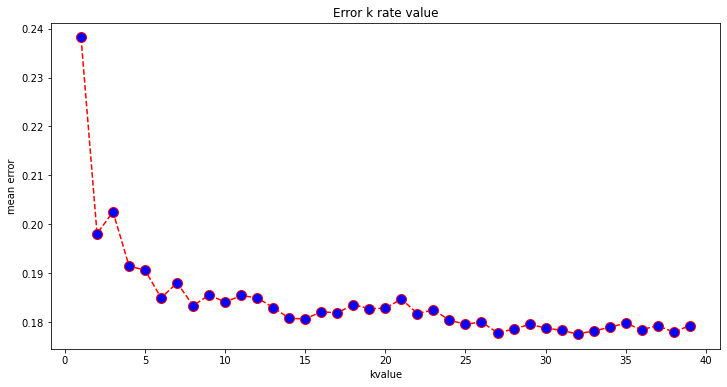

In [10]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculating error for k value between 1 and 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i !=y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor="blue", markersize=10)
plt.title('Error k rate value')
plt.xlabel('kvalue')
plt.ylabel('mean error')

### Training

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier()

### predicting whether new customer with age, salary will buy or not

In [17]:
age =  int(input("enter new employee age:"))
edu =  int(input("enter new employee edu:"))
sex = int(input("enter employee gender 0-male 1-female:" ))
cg =  int(input("enter new employee capital gain:"))
wh =  int(input("enter new employee hours per week:"))
newemp = [[age, edu, sex, cg, wh]]
result = model.predict(sc.transform(newemp ))
print(result)

if result==1:
    print("emp might got salary above 50K")
else:
    print("emp might not got salary above 50K")

enter new employee age:37
enter new employee edu:10
enter employee gender 0-male 1-female:0
enter new employee capital gain:0
enter new employee hours per week:80
[1]
emp might got salary above 50K


### Prediction for all test data

In [12]:
y_pred = model.predict(X_test)

### evaluation model

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuraccy of the model:{0}%".format(accuracy_score(y_test,y_pred)*100))

Accuraccy of the model:80.93600294804078%
